In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re

In [2]:
releases = pd.read_csv('netflix_releases.csv', encoding= 'latin-1', index_col=0)

In [3]:
deletions = pd.read_csv('netflix_deletions.csv', encoding= 'latin-1', index_col=0)

In [6]:
new_releases = releases.copy()
new_deletions = deletions.copy()

In [7]:
new_releases['date'] = new_releases['month'] + ', ' + new_releases['year'].astype(str)
new_deletions['date'] = new_deletions['month'] + ', ' + new_deletions['year'].astype(str)

In [8]:
new_releases['date'] = new_releases['date'].map(lambda x: x.replace('January','1').replace('February','2').replace('March','3').replace('April','4').replace('May','5').replace('June','6').replace('July','7').replace('August','8').replace('September','9').replace('October','10').replace('November','11').replace('December','12'))
new_deletions['date'] = new_deletions['date'].map(lambda x: x.replace('January','1').replace('February','2').replace('March','3').replace('April','4').replace('May','5').replace('June','6').replace('July','7').replace('August','8').replace('September','9').replace('October','10').replace('November','11').replace('December','12'))

In [9]:
life_cycle = pd.merge(new_releases, new_deletions, how = 'inner', on = ['title','content_type'])

In [10]:
life_cycle['date_x'] = pd.to_datetime(life_cycle['date_x'])
life_cycle['date_y'] = pd.to_datetime(life_cycle['date_y'])

In [11]:
#Calculate the lifecycle for titles which were added and deleted within the last 5 years
life_cycle['lifetime'] = life_cycle['date_y'] - life_cycle['date_x']

In [12]:
#Filter out titles that were deleted and then added back to Netflix within the last 5 years
x = life_cycle[life_cycle['lifetime'] > '0 days']
life_cycle = x

In [13]:
#Average lifecycle of a title on Netflix
life_cycle[['lifetime']].mean()

lifetime   430 days 10:57:20.142095
dtype: timedelta64[ns]

In [14]:
df = life_cycle.groupby(['content_type','lifetime']).count().reset_index()[['content_type','lifetime']]


In [15]:
df.lifetime = (df.lifetime / np.timedelta64(30, 'D')).astype(int)

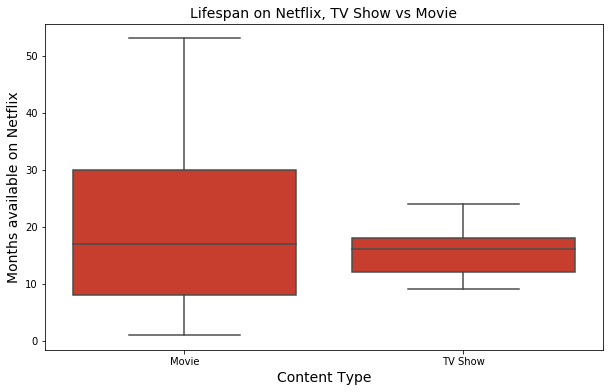

In [107]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'content_type', y = 'lifetime', data = df, palette = {"TV Show": '#E02A15', "Movie": '#E02A15'})
plt.xlabel('Content Type', fontsize = 14)
plt.ylabel('Months available on Netflix', fontsize = 14)
plt.title('Lifespan on Netflix, TV Show vs Movie', fontsize = 14)
plt.savefig('boxplot.png', dpi = 400)

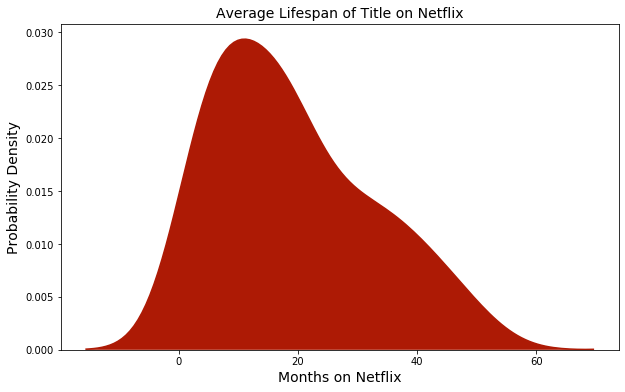

In [108]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['lifetime'],shade=True, alpha = 1, color = '#AD1A05', label = '')
# plt.axvline(11, color = 'black', linestyle = '--')
plt.xlabel('Months on Netflix', fontsize = 14)
plt.ylabel('Probability Density', fontsize = 14)
plt.title('Average Lifespan of Title on Netflix', fontsize = 14)
plt.savefig('densityplot.png', dpi = 400)

In [18]:
df.groupby('lifetime').count().reset_index().sort_values(by = 'content_type', ascending = False)[['lifetime']].iloc[0][0]

18

<Figure size 720x432 with 0 Axes>

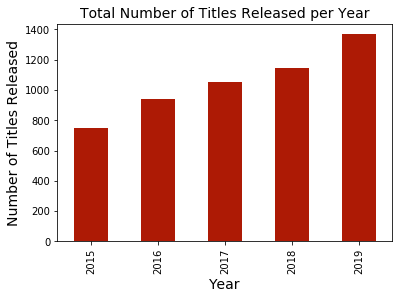

In [109]:
plt.figure(figsize=(10,6))
releases.groupby(['year']).count().plot.bar(color='#AD1A05')
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of Titles Released', fontsize = 14)
plt.title('Total Number of Titles Released per Year', fontsize = 14)
plt.legend().remove()
plt.savefig('barlpot_releases_per_year.png', dpi = 400)

In [101]:
releases.groupby(['year']).count()

,day,month,content_type
year,,,
2015,746,746,746
2016,943,943,943
2017,1051,1051,1051
2018,1145,1145,1145
2019,1368,1368,1368


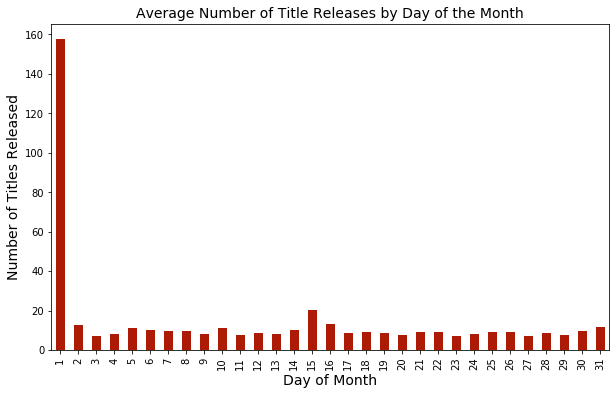

In [110]:
plt.figure(figsize=(10,6))
releases.groupby(['month','day']).count().reset_index().groupby('day').mean()['year'].plot.bar(color = '#AD1A05')
plt.xlabel('Day of Month',fontsize = 14)
plt.ylabel('Number of Titles Released', fontsize = 14)
plt.title('Average Number of Title Releases by Day of the Month',fontsize = 14)
plt.savefig('releases_per_day_average.png', dpi = 400)

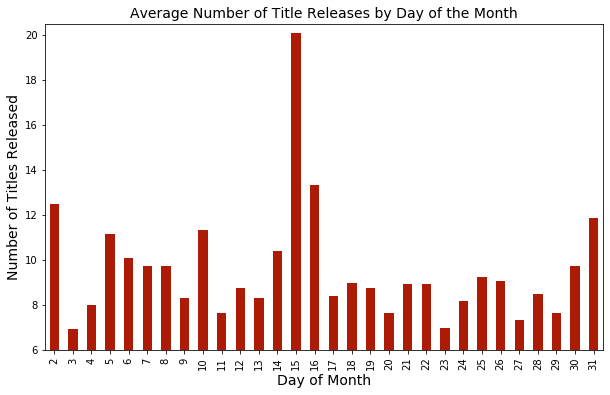

In [111]:
#Same without day one
plt.figure(figsize=(10,6))
releases[releases['day'] != 1].groupby(['month','day']).count().reset_index().groupby('day').mean()['year'].plot.bar(color = '#AD1A05',ylim = (6.0,20.5))
plt.xlabel('Day of Month', fontsize = 14)
plt.ylabel('Number of Titles Released', fontsize = 14)
plt.title('Average Number of Title Releases by Day of the Month', fontsize = 14)
plt.savefig('releases_per_day(without 1).png', dpi = 400)

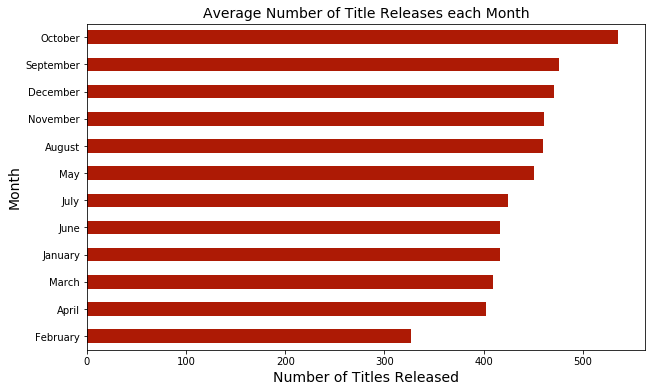

In [112]:
plt.figure(figsize=(10,6))
releases.groupby(['month']).count().reset_index().groupby('month').mean()['year'].sort_values(ascending = True).plot.barh(color = '#AD1A05')
plt.ylabel('Month', fontsize = 14)
plt.xlabel('Number of Titles Released', fontsize = 14)
plt.title('Average Number of Title Releases each Month', fontsize = 14)
plt.savefig('releases_per_month.png', dpi = 400)

In [23]:
df2.set_index("date_r").plot(color = '#AD1A05')
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of Titles Released', fontsize = 14)
plt.title('Deletion Dynamics Over the Last 5 Years', fontsize = 14)
plt.legend().remove()

NameError: name 'df2' is not defined

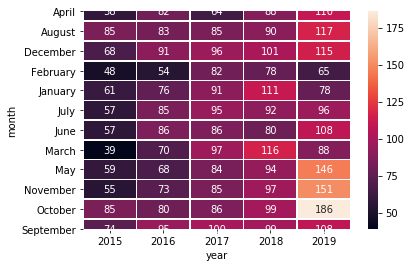

In [26]:

# plt.figure(figsize=(6,6))
releases.groupby(['month', 'year']).count()[['day']].reset_index().pivot('month', 'year', 'day')
sns.heatmap(releases.groupby(['month', 'year']).count()[['day']].reset_index().pivot('month', 'year', 'day'), annot = True, linewidths=.5, fmt = 'd' )

# plt.savefig('test2.png')

In [27]:
df2 = new_releases.reset_index()[['month', 'date', 'year']]
df2['date'] = pd.to_datetime(df2['date'])
df2.columns = ['month_r', 'date_r', 'year_r']

In [28]:
df3 = new_deletions.reset_index()[['month', 'date', 'year']]
df3['date'] = pd.to_datetime(df3['date'])
df3.columns = ['month_d', 'date_d', 'year_d']

In [29]:
df2 = df2.groupby('date_r').count().reset_index()[['date_r', 'month_r']]
df3 = df3.groupby('date_d').count().reset_index()[['date_d', 'month_d']]

In [30]:
r_vs_d = pd.concat([df2, df3], axis = 1)  #default is axis = 0

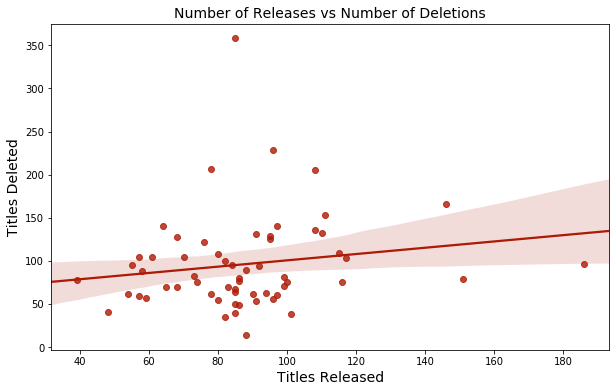

In [181]:
plt.figure(figsize=(10,6))
sns.regplot("month_r", "month_d", r_vs_d, color ='#AD1A05')
plt.xlabel('Titles Released',fontsize = 14)
plt.ylabel('Titles Deleted', fontsize = 14)
plt.title('Number of Releases vs Number of Deletions',fontsize = 14)
plt.savefig('released_vs_deleted.png', dpi = 400)

<Figure size 720x432 with 0 Axes>

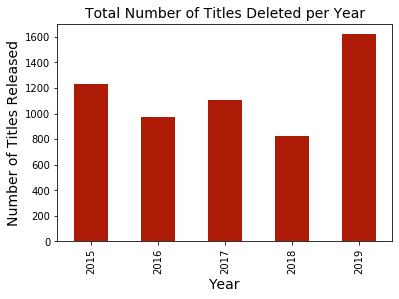

In [119]:
plt.figure(figsize=(10,6))
deletions.groupby(['year']).count().plot.bar(color='#AD1A05')
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of Titles Released', fontsize = 14)
plt.title('Total Number of Titles Deleted per Year', fontsize = 14)
plt.legend().remove()
plt.savefig('deleted_per_year.png', dpi = 400)

No handles with labels found to put in legend.


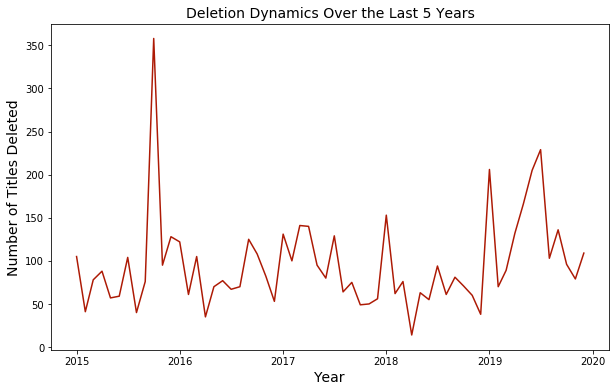

In [122]:
plt.figure(figsize=(10,6))
plt.plot(df3.set_index("date_d"),color = '#AD1A05')
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of Titles Deleted', fontsize = 14)
plt.title('Deletion Dynamics Over the Last 5 Years', fontsize = 14)
plt.legend().remove()
plt.savefig('deletion_dynamics.png', dpi = 400)

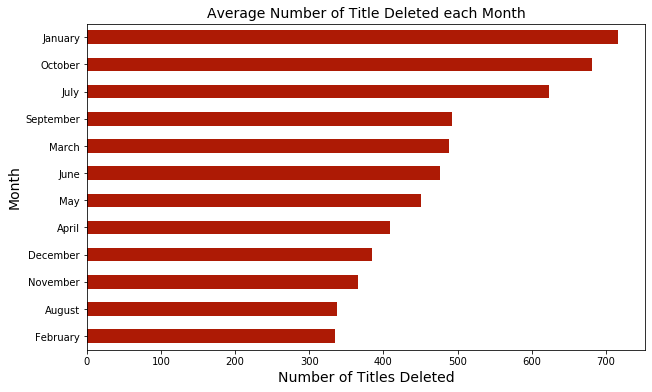

In [116]:
plt.figure(figsize=(10,6))
deletions.groupby(['month']).count().reset_index().groupby('month').mean()['year'].sort_values(ascending = True).plot.barh(color = '#AD1A05')
plt.ylabel('Month', fontsize = 14)
plt.xlabel('Number of Titles Deleted', fontsize = 14)
plt.title('Average Number of Title Deleted each Month', fontsize = 14)
plt.savefig('deleted_per_month.png', dpi = 400)

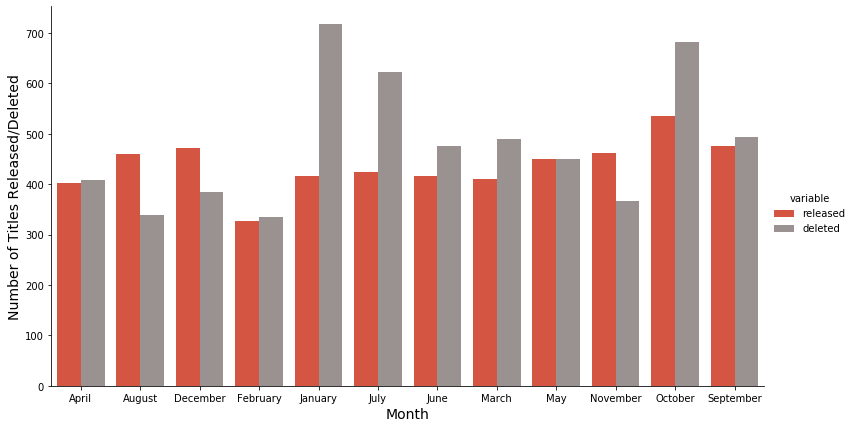

In [179]:
a = releases.groupby(['month']).count().reset_index().groupby('month').mean()[['year']]
b = deletions.groupby(['month']).count().reset_index().groupby('month').mean()[['year']]
c = pd.concat([a, b], axis = 1)
c.columns = ['released', 'deleted']
c = c.reset_index().melt('month')


sns.catplot(x= "month", y="value", hue="variable", data=c, height=6, aspect = 1.8, kind="bar", palette = ['#ED4429','#9A9190'])
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Number of Titles Released/Deleted', fontsize = 14)
# plt.title('Releases vs Deletions for Each Month', fontsize = 14)
# plt.savefig('addition_vs_deletions_per_month.png', dpi = 400)

No handles with labels found to put in legend.


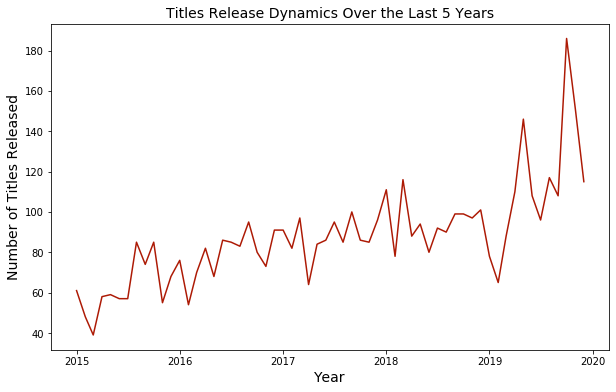

In [164]:
plt.figure(figsize=(10,6))
plt.plot(df2.set_index("date_r"),color = '#AD1A05')
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of Titles Released', fontsize = 14)
plt.title('Titles Release Dynamics Over the Last 5 Years', fontsize = 14)
plt.legend().remove()
plt.savefig('releases_dynamics.png', dpi = 400)

Text(27.766174768518525, 0.5, 'Number of Titles Released/Deleted')

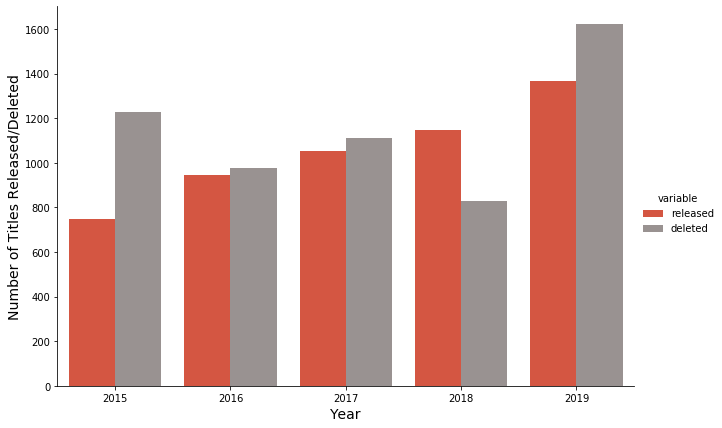

In [180]:
a = releases.groupby(['year']).count().reset_index().groupby('year').mean()[['month']]
a.columns = ['released']

b = deletions.groupby(['year']).count().reset_index().groupby('year').mean()[['month']]
b.columns = ['deleted']

c = pd.concat([a, b], axis = 1)  #default is axis = 0

c = c.reset_index().melt('year')


sns.catplot(x = "year", y ="value", hue="variable", data=c, height=6, aspect = 1.5, kind="bar", palette = ['#ED4429','#9A9190'])
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of Titles Released/Deleted', fontsize = 14)
# plt.title('Releases vs Deletions for Each Month', fontsize = 14)
# plt.savefig('addition_vs_deletions_per_year.png', dpi = 400)